In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pandas_datareader as data

In [9]:
start = '2010-01-01'
end = '2022-12-31'
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,3.800,5.000,3.508,4.778,93831500
1,5.158,6.084,4.660,4.766,85935500
2,5.000,5.184,4.054,4.392,41094000
3,4.600,4.620,3.742,3.840,25699000
4,4.000,4.000,3.166,3.222,34334500


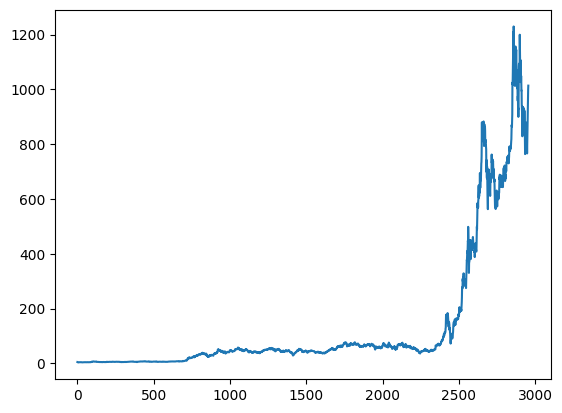

In [11]:
plt.plot(df.Close)

In [12]:
df

,Open,High,Low,Close,Volume
0,3.800000,5.000000,3.508000,4.778000,93831500
1,5.158000,6.084000,4.660000,4.766000,85935500
2,5.000000,5.184000,4.054000,4.392000,41094000
3,4.600000,4.620000,3.742000,3.840000,25699000
4,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2951,874.489990,907.849976,867.390015,905.390015,33408500
2952,914.979980,942.849976,907.090027,921.159973,27327200
2953,930.000000,997.859985,921.750000,993.979980,35289500
2954,979.940002,1040.699951,976.400024,999.109985,40225400


In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    988.279197
2952    987.306497
2953    986.867697
2954    986.088396
2955    985.087596
Name: Close, Length: 2956, dtype: float64

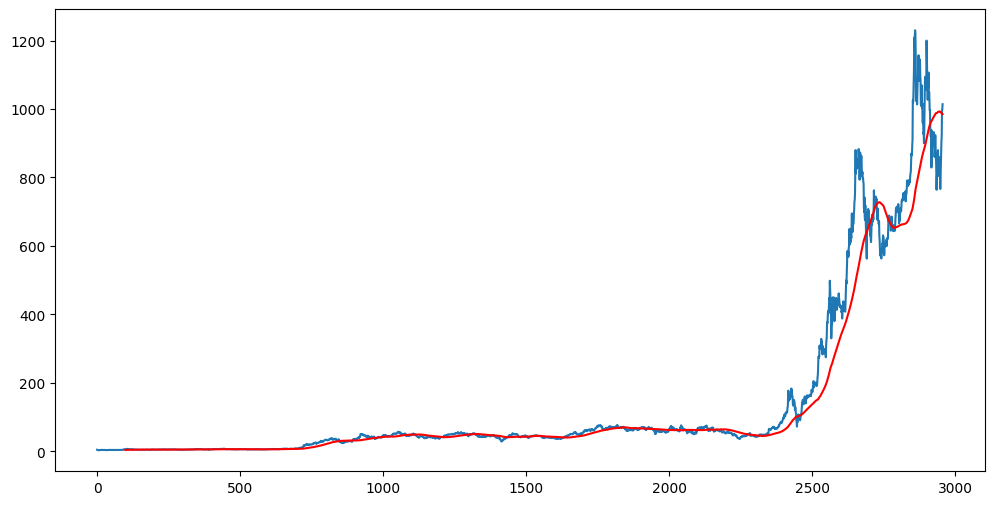

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2951    851.032347
2952    852.642897
2953    854.587147
2954    856.564747
2955    858.640447
Name: Close, Length: 2956, dtype: float64

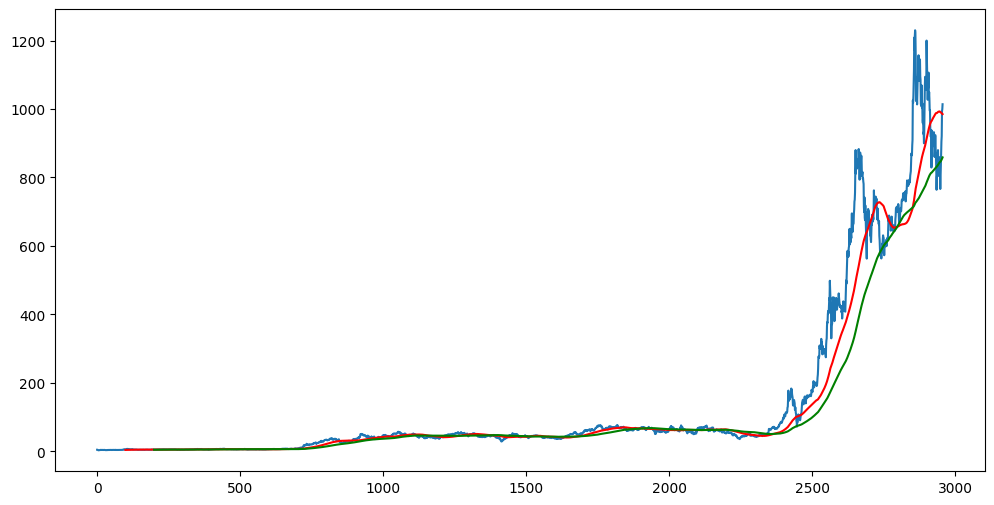

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
df.shape

(2956, 5)

In [19]:
# splitting Data into Training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2069, 1)
(887, 1)


In [20]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [21]:
data_testing.head()

,Close
2069,58.967999
2070,56.992001
2071,59.804001
2072,59.666000
2073,59.820000


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       ...,
       [0.74414954],
       [0.74122424],
       [0.75677141]])

In [ ]:
x_train = []
y_train = []